In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2020.deeplearning/master/init.py
from init import init; init(force_download=False)

replicating local resources


In [ ]:
!mkdir -p ./local/datasets/
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo" -O local/datasets/Dataset_JPV.zip && rm -rf /tmp/cookies.txt

--2021-05-10 18:47:57--  https://docs.google.com/uc?export=download&confirm=8fze&id=15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo
Resolving docs.google.com (docs.google.com)... 142.251.33.206, 2607:f8b0:4004:837::200e
Connecting to docs.google.com (docs.google.com)|142.251.33.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-2o-docs.googleusercontent.com/docs/securesc/em07fhuksp6vieu6tmtcbtccj9q1tl8v/uqb41gtadd46eogd0p0dm1qcakbv94pk/1620672450000/14059520846711589950/15809853991404937091Z/15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo?e=download [following]
--2021-05-10 18:47:57--  https://doc-04-2o-docs.googleusercontent.com/docs/securesc/em07fhuksp6vieu6tmtcbtccj9q1tl8v/uqb41gtadd46eogd0p0dm1qcakbv94pk/1620672450000/14059520846711589950/15809853991404937091Z/15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo?e=download
Resolving doc-04-2o-docs.googleusercontent.com (doc-04-2o-docs.googleusercontent.com)... 172.217.164.161, 2607:f8b0:4004:815::2001
Connecting to doc-

## Use GPU runtime

In [ ]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
    %load_ext tensorboard
import tensorflow as tf
tf.__version__

setting tensorflow version in colab


'2.4.1'

In [ ]:
#tf.compat.v1.py_function()

## Import Libraries

In [ ]:
import tensorflow as tf
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from local.lib import mlutils # no se logro instalar las utilidades
import pickle, bz2
from skimage import io
%matplotlib inline

# function to unzip data

In [ ]:
!unzip -o "./local/datasets/Dataset_JPV.zip" -d Dataset_JPV > /dev/null
#!unzip -o stage1_train.zip -d stage1_train > /dev/null

mapname:  conversion of  failed


##Import lybraris

In [ ]:
from progressbar import progressbar as pbar
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout, Lambda
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K

import tensorflow as tf
print (tf.__version__)
# Set some parameters
IMG_WIDTH = 320
IMG_HEIGHT = 240
IMG_CHANNELS = 3
TRAIN_PATH = 'Dataset_JPV/test/x'
TEST_PATH = 'Dataset_JPV/test/x'

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed

2.4.1


In [ ]:
import glob

In [ ]:
dataset_path = os.path.join('Dataset_JPV', 'test')#chance to train


In [ ]:
dataset_dir=dataset_path
X_list= sorted(glob.glob(os.path.join(dataset_dir, 'x','*.jpg')))
print(X_list[:5])

['Dataset_JPV/test/x/img0.jpg', 'Dataset_JPV/test/x/img1.jpg', 'Dataset_JPV/test/x/img10.jpg', 'Dataset_JPV/test/x/img100.jpg', 'Dataset_JPV/test/x/img101.jpg']


In [ ]:
# load data func
import glob
from keras.preprocessing import image as kImage

def getData(dataset_dir):
    X_list= sorted(glob.glob(os.path.join(dataset_dir, 'x','*.jpg')))
    Y_list = sorted(glob.glob(os.path.join(dataset_dir, 'y' ,'*.png')))
    
    X= []
    Y= []
    for i in range(len(X_list)):
        # Load input image
        x = kImage.load_img(X_list[i])
        x = kImage.img_to_array(x)
        X.append(x)
        
        # Load ground-truth label and encode it to label 0 and 1
        y = kImage.load_img(Y_list[i], color_mode = "grayscale")#grayscale = True)
        y = kImage.img_to_array(y)
        y /= 255.0
        y = np.floor(y)# ?
        Y.append(y)
    X = np.asarray(X)
    Y = np.asarray(Y)
    
    # Shuffle the training data
    idx = list(range(X.shape[0]))
    np.random.shuffle(idx)
    X = X[idx]
    Y = Y[idx]
    return X, Y

In [ ]:
X, Y = getData(dataset_path)

In [ ]:
#X.shape, Y.shape

In [ ]:
def show_img(img, title="", cmap=None, details=True):
    plt.imshow(img, cmap=cmap)#, cmap=cmap
    if details:
        plt.title("%s min %d, max %d\nshape %s"%(title, np.min(img), np.max(img), str(img.shape)))
    else:
        plt.title(title)
    plt.axis("off")
    
plt.figure(figsize=(15,6))
ids = np.random.permutation(len(X))[:5]
for c,i in enumerate(ids):
    plt.subplot(2,5,c+1)
    show_img(X[i]/255, "IMAGE %d"%i)#.mean(axis=2)
    plt.subplot(2,5,c+6)
    show_img(np.squeeze(Y[i]), "LABEL %d"%i, cmap=plt.cm.Greys_r)

NameError: ignored

<Figure size 1080x432 with 0 Axes>

# Build and train our neural network
Next we build our U-Net model, loosely based on [U-Net: Convolutional Networks for PV sistems Image Segmentation](https://arxiv.org/pdf/1505.04597.pdf) and very similar to [this repo](https://github.com/jocicmarko/ultrasound-nerve-segmentation) from the Kaggle Ultrasound Nerve Segmentation competition.

![](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)

In [ ]:
def dice_coef(y_true, y_pred, smooth=1.0):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [ ]:
dataset_path1 = os.path.join('Dataset_JPV', 'train')
X_train, Y_train = getData(dataset_path1)
X_train.shape, Y_train.shape

((2864, 240, 320, 3), (2864, 240, 320, 1))

In [ ]:
X_val = X_train[-400:]
Y_val = Y_train[-400:]
X_val.shape, Y_val.shape

((400, 240, 320, 3), (400, 240, 320, 1))

In [ ]:
def IoU_metric(y_true, y_pred, threshold=0.5):   
    y_pred = K.squeeze(tf.cast(y_pred>threshold,tf.int32),-1)
    y_true = K.cast(y_true[..., 0], K.floatx())
    y_pred = K.cast(y_pred, K.floatx())
    truth_areas = K.sum(y_true, axis=[1, 2])
    pred_areas = K.sum(y_pred, axis=[1, 2])
    intersection = K.sum(y_true * y_pred, axis=[1, 2])
    union = K.clip(truth_areas + pred_areas - intersection, 1e-9, 128 * 128)
    check = K.map_fn(lambda x: K.equal(x, 0), truth_areas + pred_areas, dtype=tf.bool)
    p = intersection / union
    iou = K.switch(check, p + 1., p)

    prec = K.map_fn(lambda x: K.mean(K.greater(x, np.arange(0.5, 1.0, 0.05))), iou, dtype=tf.float32)
    prec_iou = K.mean(prec)
    return prec_iou


In [ ]:
def get_model():
    
    # Build U-Net model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))# inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = Lambda(lambda x: x / 255) (inputs)

    c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
    c1 = Dropout(0.1) (c1)
    c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
    p1 = MaxPooling2D((2, 2)) (c1)

    c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
    c2 = Dropout(0.1) (c2)
    c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
    p2 = MaxPooling2D((2, 2)) (c2)

    c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
    c3 = Dropout(0.2) (c3)
    c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
    p3 = MaxPooling2D((2, 2)) (c3)

    c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
    c4 = Dropout(0.2) (c4)
    c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

    c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
    c5 = Dropout(0.3) (c5)
    c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
    c6 = Dropout(0.2) (c6)
    c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
    c7 = Dropout(0.2) (c7)
    c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
    c8 = Dropout(0.1) (c8)
    c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
    c9 = Dropout(0.1) (c9)
    c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[ dice_coef,IoU_metric])#, MeanIoU]), iou_metric, UpdatedMeanIoU
    
    return model

In [ ]:
model = get_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 240, 320, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 240, 320, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 240, 320, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 240, 320, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [ ]:
#earlystopper = EarlyStopping(patience=2, verbose=1)
#checkpointer = ModelCheckpoint('model-dsbowl2018-1.h5', verbose=1, save_best_only=True)
#results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=10,callbacks=[earlystopper, checkpointer])

In [ ]:
results=model.fit(X_train, Y_train,  validation_split=0.1 , batch_size=8, epochs=16, validation_data=(X_val,Y_val))#validation_data=(X,Y)

Epoch 1/16
Instructions for updating:
Use fn_output_signature instead
323/323 [==============================] - 71s 111ms/step - loss: 0.4877 - dice_coef: 0.4573 - IoU_metric: 0.3570 - val_loss: 0.5582 - val_dice_coef: 0.4945 - val_IoU_metric: 0.3803
Epoch 2/16
323/323 [==============================] - 34s 107ms/step - loss: 0.3438 - dice_coef: 0.5941 - IoU_metric: 0.6237 - val_loss: 0.4226 - val_dice_coef: 0.4751 - val_IoU_metric: 0.2850
Epoch 3/16
323/323 [==============================] - 35s 108ms/step - loss: 0.3285 - dice_coef: 0.6114 - IoU_metric: 0.6376 - val_loss: 0.3146 - val_dice_coef: 0.6043 - val_IoU_metric: 0.5884
Epoch 4/16
323/323 [==============================] - 35s 108ms/step - loss: 0.3088 - dice_coef: 0.6467 - IoU_metric: 0.6741 - val_loss: 0.2989 - val_dice_coef: 0.6491 - val_IoU_metric: 0.5639
Epoch 5/16
323/323 [==============================] - 35s 108ms/step - loss: 0.2663 - dice_coef: 0.7043 - IoU_metric: 0.7179 - val_loss: 0.2903 - val_dice_coef: 0.6777 -

In [ ]:
model.save("segmentationPVfarms_with_Unet.model");
model.save("SegmatationModel.h5")

INFO:tensorflow:Assets written to: segmentationPVfarms_with_Unet.model/assets


In [ ]:
#with open('segmentationPVplants_with_Unet.architecture.json', 'w') as f:
#    f.write(model.to_json())

In [ ]:
#import joblib
#joblib.dump(model,open('SegPVmodel.pckl','wb'))


In [ ]:
!ls -lash segmentationPVplants_with_Unet*

ls: cannot access 'segmentationPVplants_with_Unet*': No such file or directory


In [ ]:
!head segmentationPVplants_with_Unet.architecture.json

head: cannot open 'segmentationPVplants_with_Unet.architecture.json' for reading: No such file or directory


In [ ]:
!zip -r segmentationPVplants_with_Unet.model.zip segmentationPVfarms_with_Unet.model

  adding: segmentationPVfarms_with_Unet.model/ (stored 0%)
  adding: segmentationPVfarms_with_Unet.model/saved_model.pb (deflated 90%)
  adding: segmentationPVfarms_with_Unet.model/variables/ (stored 0%)
  adding: segmentationPVfarms_with_Unet.model/variables/variables.index (deflated 76%)
  adding: segmentationPVfarms_with_Unet.model/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: segmentationPVfarms_with_Unet.model/assets/ (stored 0%)


In [ ]:
import keras

In [ ]:
# Predict on train, val and test
#model = keras.models.load_model('my_model.h5')
#model = load_model('SegmatationModel.h5')#, custom_objects={'mean_iou': my_iou_metric})
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_ttrain = model.predict(X_train, verbose=1)
#preds_test = model.predict(X, verbose=1)

# Threshold predictions
preds_train_tt = (preds_ttrain > 0.5).astype(np.uint8)
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
#preds_test_t = (preds_test > 0.5).astype(np.uint8)



90/90 [==============================] - 10s 116ms/step


In [ ]:
train_Accuracy = np.mean(preds_train_tt.astype(int) == Y_train)
test_Accuracy = np.mean(preds_test_t == Y)
print('Train accuracy = ', train_Accuracy*100, '%')
print('Test accuracy = ', test_Accuracy*100, '%')

NameError: ignored

In [ ]:
print(results.history.keys())

dict_keys(['loss', 'dice_coef', 'IoU_metric', 'val_loss', 'val_dice_coef', 'val_IoU_metric'])


Text(0.5, 1.0, 'b) Dice Coefficient during Model Training')

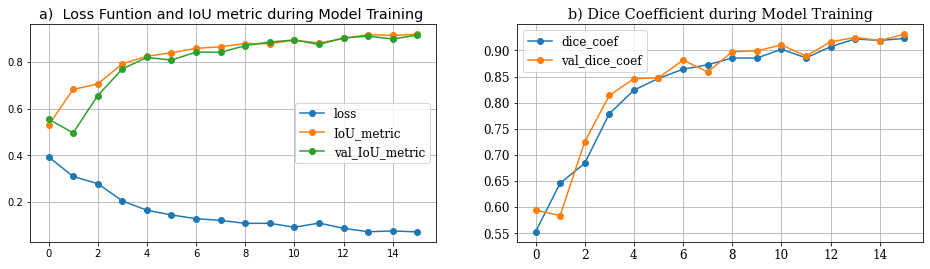

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(121)#211
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 12
plt.plot(results.history["loss"], label="loss", marker="o")
#plt.plot(results.history["my_iou_metric"], label="meanIoU", marker="o")
plt.plot(results.history["IoU_metric"], label="IoU_metric", marker="o")
plt.plot(results.history["val_IoU_metric"], label="val_IoU_metric", marker="o")
plt.grid()
plt.legend()
plt.title("a)  Loss Funtion and IoU metric during Model Training ")
plt.subplot(122)#212
plt.plot(results.history["dice_coef"], label="dice_coef", marker="o")
plt.plot(results.history["val_dice_coef"], label="val_dice_coef", marker="o")
plt.grid()
plt.legend()
plt.title("b) Dice Coefficient during Model Training")

#performance on validation data

In [ ]:
ids=[i+20 for i in range(5)]
print(ids)

[20, 21, 22, 23, 24]


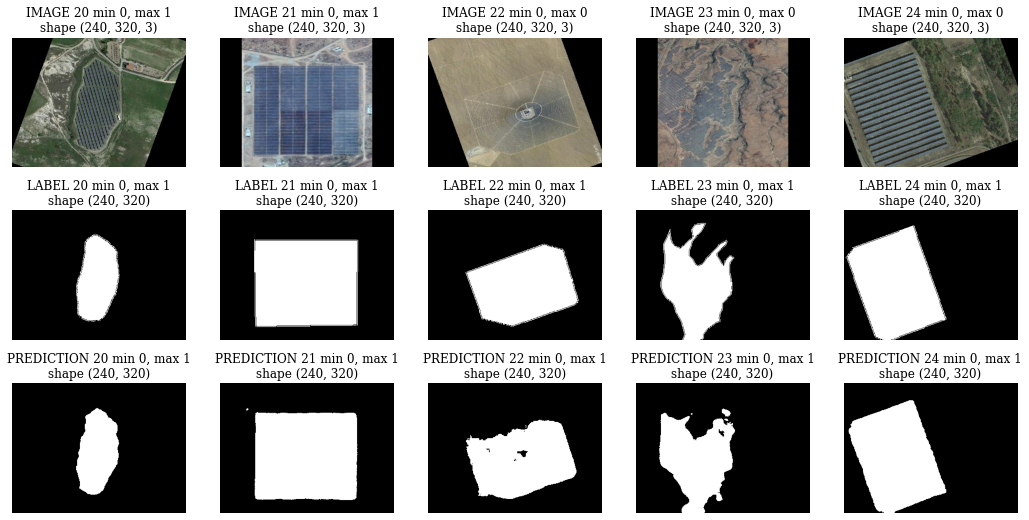

In [ ]:
plt.figure(figsize=(18,9))
plt.rcParams['font.size'] = 10
# ids = np.random.permutation(len(preds_val))[:5]


for c,i in enumerate(ids):
    plt.subplot(3,5,c+1)
    show_img(X_train[int(X_train.shape[0]*0.9):][i]/255, "IMAGE %d"%i)
    plt.subplot(3,5,c+6)
    show_img(np.squeeze(Y_train[int(X_train.shape[0]*0.9):][i]), "LABEL %d"%i, cmap=plt.cm.Greys_r)
    plt.subplot(3,5,c+11)
    show_img(np.squeeze(preds_val_t[i]), "PREDICTION %d"%i, cmap=plt.cm.Greys_r)

## And on test data
The model is at least able to fit to the training data! Certainly a lot of room for improvement even here, but a decent start. How about the validation data?

In [ ]:
def getDataSorted(dataset_dir):
    X_list= sorted(glob.glob(os.path.join(dataset_dir, 'x','*.jpg')))
    Y_list = sorted(glob.glob(os.path.join(dataset_dir, 'y' ,'*.png')))
    
    X= []
    Y= []
    for i in range(len(X_list)):
        # Load input image
        x = kImage.load_img(X_list[i])
        x = kImage.img_to_array(x)
        X.append(x)
        
        # Load ground-truth label and encode it to label 0 and 1
        y = kImage.load_img(Y_list[i], color_mode = "grayscale")#grayscale = True)
        y = kImage.img_to_array(y)
        y /= 255.0
        y = np.floor(y)# ?
        Y.append(y)
    X = np.asarray(X)
    Y = np.asarray(Y)
    
    # Shuffle the training data
    # idx = list(range(X.shape[0]))
    # np.random.shuffle(idx)
    # X = X[idx]
    # Y = Y[idx]
    return X, Y

In [ ]:
dataset_path = os.path.join('Dataset_JPV', 'test')
X, Y = getDataSorted(dataset_path)

In [ ]:
pred = model.predict(X, verbose=1, batch_size=1)

716/716 [==============================] - 4s 5ms/step


In [ ]:
preds_test = (pred > 0.5).astype(np.uint8)

In [ ]:
ids=[104,202,302,408,505]

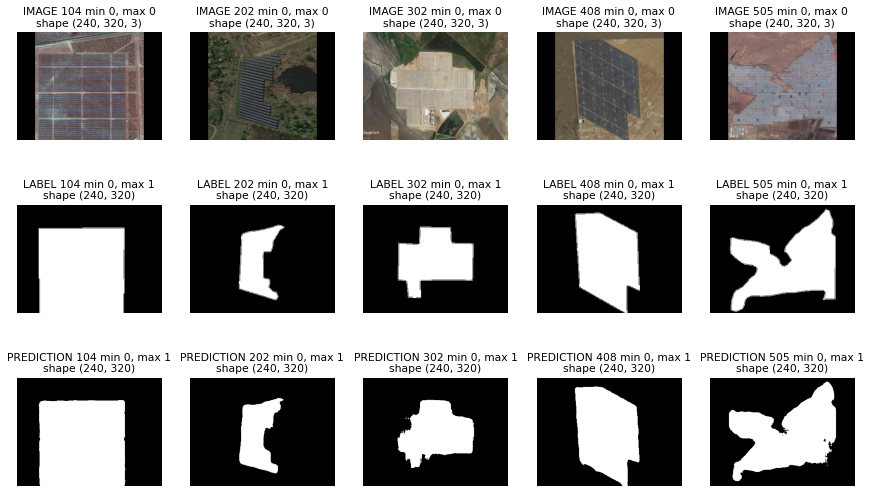

In [ ]:
plt.figure(figsize=(15,9))
plt.rcParams['font.size'] = 9
for c,i in enumerate(ids):
    plt.subplot(3,5,c+1)
    show_img(X[i]/255, "IMAGE %d"%i)
    plt.subplot(3,5,c+6)
    show_img(np.squeeze(Y[:][i]), "LABEL %d"%i, cmap=plt.cm.Greys_r)
    plt.subplot(3,5,c+11)
    show_img(np.squeeze(preds_test[i]), "PREDICTION %d"%i, cmap=plt.cm.Greys_r)

In [ ]:
print(preds_test_t[0:1][0][0][0].astype('float32'))

[0.]


In [ ]:
dc=dice_coef(y_true=Y, y_pred=preds_test_t.astype('float32'))
print("dice_coef. %",dc*100)

dice_coef. % tf.Tensor(93.128044, shape=(), dtype=float32)


In [ ]:
mIoU=IoU_metric(y_true=Y,y_pred=preds_test_t.astype('float32'))
print("IoU metric. %",mIoU*100)

IoU metric. % tf.Tensor(90.92179, shape=(), dtype=float32)


In [ ]:
!mkdir -p ./local/datasets/
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=11bDHmVAnGjpjTVLoKDHzboMWWRUgbHE0' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=11bDHmVAnGjpjTVLoKDHzboMWWRUgbHE0" -O local/datasets/model.h5 && rm -rf /tmp/cookies.txt

--2021-05-06 05:02:27--  https://docs.google.com/uc?export=download&confirm=&id=11bDHmVAnGjpjTVLoKDHzboMWWRUgbHE0
Resolving docs.google.com (docs.google.com)... 142.250.65.78, 2607:f8b0:4004:810::200e
Connecting to docs.google.com (docs.google.com)|142.250.65.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-04-docs.googleusercontent.com/docs/securesc/hhcn5uvmjcgd2m4ho25muunl6mh6qb5g/leb26vos1n17lb0b2mooabj9manq7hma/1620277275000/14059520846711589950/08882506550129314308Z/11bDHmVAnGjpjTVLoKDHzboMWWRUgbHE0?e=download [following]
--2021-05-06 05:02:28--  https://doc-08-04-docs.googleusercontent.com/docs/securesc/hhcn5uvmjcgd2m4ho25muunl6mh6qb5g/leb26vos1n17lb0b2mooabj9manq7hma/1620277275000/14059520846711589950/08882506550129314308Z/11bDHmVAnGjpjTVLoKDHzboMWWRUgbHE0?e=download
Resolving doc-08-04-docs.googleusercontent.com (doc-08-04-docs.googleusercontent.com)... 142.251.33.193, 2607:f8b0:4004:837::2001
Connecting to doc-08-04-d

In [ ]:
model = keras.models.load_model('./local/datasets/model.h5')
#model = load_model('SegmatationModel.h5')#,
#preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
#preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_ttrain = model.predict(X_train, verbose=1)
preds_test = model.predict(X, verbose=1)

# Threshold predictions
#preds_train_tt = (preds_ttrain > 0.5).astype(np.uint8)
#preds_train_t = (preds_train > 0.5).astype(np.uint8)
#preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

ValueError: ignored

In [ ]:
dc=dice_coef(y_true=Y, y_pred=preds_test_t.astype('float32'))
print("dice_coef. %",dc*100)
mIoU=IoU_metric(y_true=Y,y_pred=preds_test_t.astype('float32'))
print("IoU metric. %",mIoU*100)